# **Pós-Graduação: Ciência de Dados e Inteligência Artificial.**
## **AED - Análise Estatística de Dados**
---
## **Prof. Jones E. Egydio**

* [LinkedIn](https://www.linkedin.com/in/jones-egydio-msc-3300359)
* [Lattes](http://lattes.cnpq.br/7379006374125031)
* [GitHub](https://github.com/jegydio/Postgraduate.git)
* jones.egydio@maua.br

---

**09.10.2023 - Aula 05 - Exercício Extra**

---

# **Setup**

In [ ]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Funções**

In [ ]:
def histograma(coluna, media, DP, bins):
    """Função para plotar o histograma de uma coluna."""

    df_P[coluna].hist(bins = bins,figsize=(8, 8), legend=True, grid =False)
    plt.axvline(media, color='k', linestyle='dashed', linewidth=3)
    plt.axvline(media+DP, color='r', linestyle='dashed', linewidth=3)
    plt.axvline(media-DP, color='r', linestyle='dashed', linewidth=3);

# **Dados - Premier League**

## **1 - Dados baixados direto no Colab**

In [ ]:
%%capture
!gdown 1ZQS9D7bmpwSzYNaZ1I-rtUO7iFLIAY-Q
!gdown 1-V0XphfUTo4CIuNRn8J84zOrrWEhtJR7
!gdown 18uzVYgiChiD9IJ_C4tLLTvOrR1M5qoZk
!gdown 1Avq9JGQ2O7PGbojz-8U_8-r-8PbnUQvt

In [ ]:
# Lendo os dados
### Dados da Liga - L
df_L = pd.read_csv('england-premier-league-league-2018-to-2019-stats.csv')

### Dados das partidas - P
df_P = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')

### Dados dos jogadores - J
df_J = pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')

### Dados dos times - T
df_T = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')

# **Exploração**

**Objetivos:**

Realizar uma análise estatística com base no dados da Premier League e verificar as distribuições de probabilidade teórica e real.

Análise possíveis por jogo:

1.   Número de gols por partida
2.   Número de chutes no gol
3.   Número de cartões amarelos

**Pergunta:** Qual a **chance** de que em um jogo qualquer o número de gols seja superior a 3?



In [ ]:
df_P.sample(5)

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
261,1550864700,Feb 22 2019 - 7:45pm,complete,NaN,Cardiff City,Watford,Simon Hooper,1.31,1.31,1.05,...,3.15,3.35,2.40,1.36,2.10,3.85,0.0,1.87,1.91,Cardiff City Stadium (Cardiff (Caerdydd))
270,1551210300,Feb 26 2019 - 7:45pm,complete,NaN,Huddersfield Town,Wolverhampton Wanderers,David Coote,0.36,1.46,0.47,...,4.95,3.45,1.83,1.50,2.50,5.00,0.0,2.30,1.61,John Smith's Stadium (Huddersfield- West Yorks...
229,1548000000,Jan 20 2019 - 4:00pm,complete,NaN,Fulham,Tottenham Hotspur,Craig Pawson,1.20,2.50,1.11,...,5.65,3.80,1.71,1.26,1.83,3.10,0.0,1.69,1.95,Craven Cottage (London)
338,1555768800,Apr 20 2019 - 2:00pm,complete,NaN,Huddersfield Town,Watford,Roger East,0.47,1.18,0.47,...,4.10,3.60,1.91,1.28,1.87,3.25,0.0,1.77,2.00,John Smith's Stadium (Huddersfield- West Yorks...
265,1550934000,Feb 23 2019 - 3:00pm,complete,NaN,Newcastle United,Huddersfield Town,Kevin Friend,1.00,0.50,1.32,...,1.95,3.30,4.80,1.49,2.50,4.90,0.0,2.20,1.65,St. James' Park (Newcastle upon Tyne)


In [ ]:
df_P.shape

(380, 61)

In [ ]:
df_P.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession

In [ ]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           0 non-null      float64
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Pre-Match PPG (Home)                 380 non-null    float64
 8   Pre-Match PPG (Away)                 380 non-null    float64
 9   home_ppg                             380 non-null    float64
 10  away_ppg                             380 non-null    float64
 11  home_team_goal_count            

In [ ]:
## Coluna para a distribuição de Poisson
coluna = 'total_goal_count'

coluna_analisada = df_P[coluna].copy()

In [ ]:
## Valores únicos
coluna_analisada.unique()

array([3, 2, 4, 0, 5, 7, 1, 6, 8])

In [ ]:
## Características da coluna de interesse
coluna_analisada.describe()

count    380.000000
mean       2.821053
std        1.601312
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: total_goal_count, dtype: float64

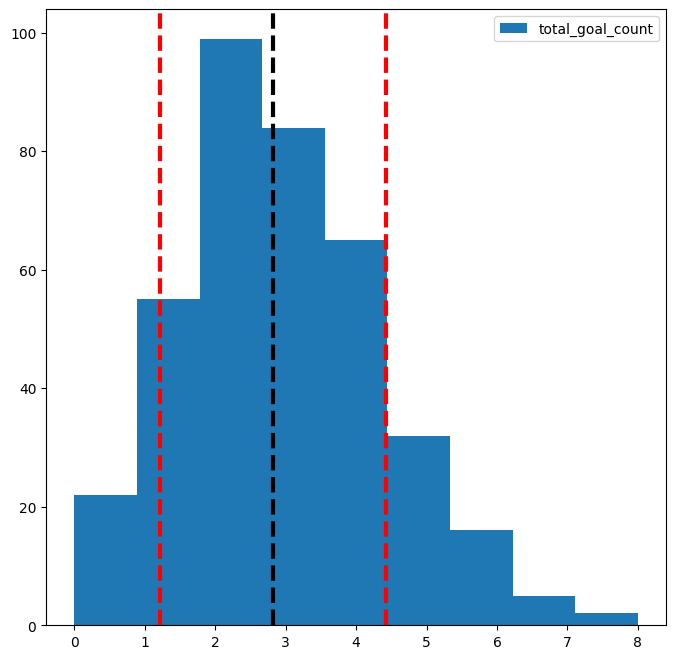

In [ ]:
# Visualizando os gols por partida - Histograma
histograma(coluna, coluna_analisada.mean(),
           coluna_analisada.std(), bins=9)

In [ ]:
coluna_analisada.value_counts()

2    99
3    84
4    65
1    55
5    32
0    22
6    16
7     5
8     2
Name: total_goal_count, dtype: int64

In [ ]:
df_P.shape

(380, 61)

In [ ]:
# Chance de ter mais que 3 gols em um jogo
(65+32+16+5+2)/380

0.3157894736842105

# **Distribuições discretas**

## **Poisson**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

\begin{equation}
  P(X=k) = \frac{\lambda^k \; e^{-\lambda}}{k!}
\end{equation}

https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_Poisson

In [ ]:
from scipy.stats import poisson

In [ ]:
df_P.shape

(380, 61)

## **Gols do time da casa**

In [ ]:
## Utilizando os gols do time da casa
coluna = 'home_team_goal_count'
media = df_P[coluna].mean()
DP = df_P[coluna].std()

df_P['dadosPoisson'] = poisson.rvs(mu=media, size=380)

In [ ]:
df_P[coluna].unique()

array([2, 1, 0, 4, 3, 6, 5])

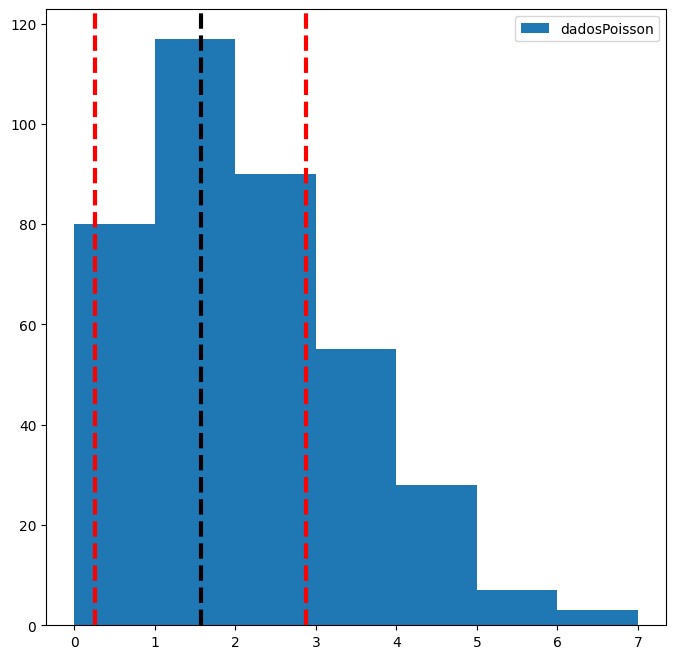

In [ ]:
## Histograma do dados gerados por Poisson
histograma('dadosPoisson', media, DP, 7)

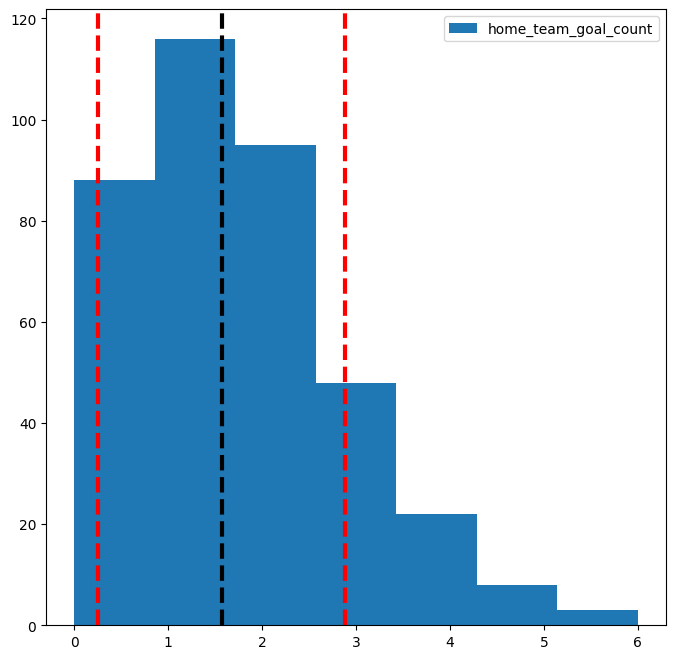

In [ ]:
## Histograma do dados reais
histograma(coluna, media, DP, 7)

### **Ajustando uma distribuição de Poisson**

In [ ]:
golsPoisson = []

for k in range(7):
    golsPoisson.append(poisson.pmf(k, media))

## probabilidades estimadas a partir da média dos dados
golsPoisson

[0.20837393422286224,
 0.326818065254805,
 0.2562941669629787,
 0.13399238904380287,
 0.052539120967175335,
 0.016480692682335013,
 0.0043081108941542354]

In [ ]:
## Comparação entre dados reais e ajuste da distribuição
golsReais, bin_limites = np.histogram(df_P[coluna], bins=7)

df_Gols = pd.DataFrame(golsReais/380, columns=['Verdadeiros'])
df_Gols['Poisson'] = golsPoisson

df_Gols

,Verdadeiros,Poisson
0,0.231579,0.208374
1,0.305263,0.326818
2,0.250000,0.256294
3,0.126316,0.133992
4,0.057895,0.052539
5,0.021053,0.016481
6,0.007895,0.004308


In [ ]:
df_Gols.Verdadeiros.sum()

1.0

In [ ]:
df_Gols.Poisson.sum()

0.9988064800281135

### **Ajustando uma distribuição Binomial**

In [ ]:
from scipy.stats import binom

golsBinomial = []
pNGol = 0.231579

for k in range(7):
    golsBinomial.append(binom.pmf(k, 7, pNGol))

## probabilidades estimadas a partir da media dos dados
golsBinomial

[0.15819566396060122,
 0.33372793774548637,
 0.3017267178870514,
 0.1515522775526382,
 0.045673302634054,
 0.008258736617576768,
 0.0008296450197490744]

In [ ]:
df_Gols['Binomial'] = golsBinomial
df_Gols

,Verdadeiros,Poisson,Binomial
0,0.231579,0.208374,0.158196
1,0.305263,0.326818,0.333728
2,0.250000,0.256294,0.301727
3,0.126316,0.133992,0.151552
4,0.057895,0.052539,0.045673
5,0.021053,0.016481,0.008259
6,0.007895,0.004308,0.000830


In [ ]:
df_Gols.Binomial.sum()

0.9999642814171571

### **Ajuste da distribuição usando curve_fit**

In [ ]:
### Bibliotecas
from scipy.optimize import curve_fit
from scipy.special import factorial

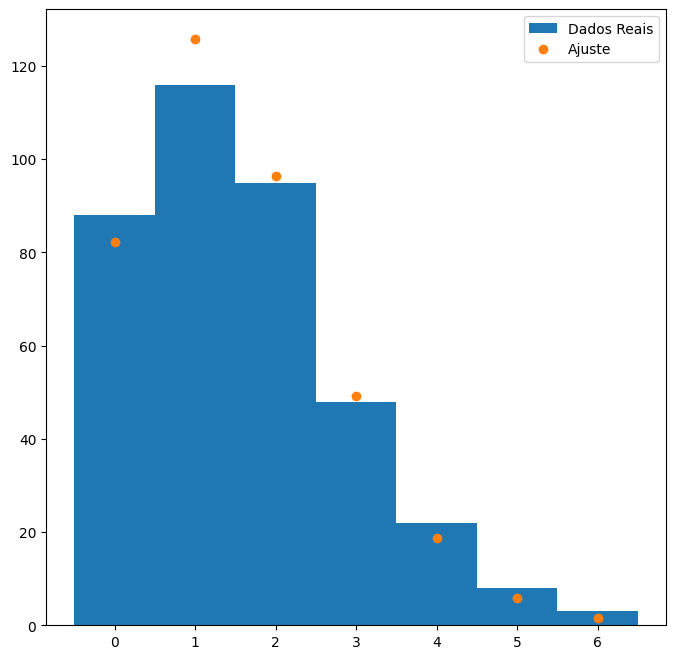

In [ ]:
### Dados Reais
dados = df_P[coluna]

### Criar números inteiros para a análise de Poisson
bins = np.arange(8) - 0.5

### Configurando a figura de comparação
plt.figure(figsize=(8, 8))

### Dados para o ajuste
estimativas, bin_limites, elementos = plt.hist(dados, bins=bins,
                                               label='Dados Reais')

### Determinar o centro de cada bin
bin_medios = 0.5 * (bin_limites[1:] + bin_limites[:-1])

### Definir uma função de Poisson geral para ajuste
def fit_function(k,lamb):
    '''Ajuste do parâmetro lambda de Poisson'''
    return poisson.pmf(k, lamb)

### Fazendo o ajuste da função
### o comando curve_fit --> utiliza como entrada os bin_medios (inteiros - Poisson)
### estimativas, varia a média lambda para reduzir o erro - intrinsecamente
parametros, cov_matriz = curve_fit(fit_function, bin_medios, estimativas/380)

### Visualização sobreposta
x_plot = np.arange(0,7)
plt.plot(x_plot, fit_function(x_plot,*parametros)*380, marker='o',
         linestyle='', label='Ajuste')

plt.legend()
plt.show()

In [ ]:
parametros

array([1.53025366])

In [ ]:
df_P[coluna].mean()

1.568421052631579

In [ ]:
## Probabilidade de um jogo ter 3 ou mais gols do time da casa
poisson.sf(3, mu=parametros[0])

0.06949685319228363

## **Total de Gols**

In [ ]:
## Utilizando Total de Gols
coluna = 'total_goal_count'
media = df_P[coluna].mean()
DP = df_P[coluna].std()

df_P['dadosPoisson'] = poisson.rvs(mu=media, size=380)

### **Ajustando uma distribuição de Poisson**

In [ ]:
golsPoisson = []

for k in range(7):
    golsPoisson.append(poisson.pmf(k, media))

## probabilidades estimadas a partir da média dos dados
golsPoisson

[0.059543232622450086,
 0.16797459308228024,
 0.2369325839265847,
 0.22279976313096386,
 0.1571324645239429,
 0.08865579051035097,
 0.041683775187322886]

In [ ]:
## Comparação entre dados reais e ajuste da distribuição
golsReais, bin_limites = np.histogram(df_P[coluna], bins=7)

df_Gols = pd.DataFrame(golsReais/380, columns=['Verdadeiros'])
df_Gols['Poisson'] = golsPoisson

df_Gols

,Verdadeiros,Poisson
0,0.202632,0.059543
1,0.260526,0.167975
2,0.221053,0.236933
3,0.171053,0.222800
4,0.084211,0.157132
5,0.042105,0.088656
6,0.018421,0.041684


In [ ]:
df_Gols.Verdadeiros.sum()

1.0

In [ ]:
df_Gols.Poisson.sum()

0.9747222029838957

### **Ajustando uma distribuição Binomial**

In [ ]:
from scipy.stats import binom

golsBinomial = []
pNGol = 0.231579

for k in range(7):
    golsBinomial.append(binom.pmf(k, 7, pNGol))

## probabilidades estimadas a partir da media dos dados
golsBinomial

[0.15819566396060122,
 0.33372793774548637,
 0.3017267178870514,
 0.1515522775526382,
 0.045673302634054,
 0.008258736617576768,
 0.0008296450197490744]

In [ ]:
df_Gols['Binomial'] = golsBinomial
df_Gols

,Verdadeiros,Poisson,Binomial
0,0.202632,0.059543,0.158196
1,0.260526,0.167975,0.333728
2,0.221053,0.236933,0.301727
3,0.171053,0.222800,0.151552
4,0.084211,0.157132,0.045673
5,0.042105,0.088656,0.008259
6,0.018421,0.041684,0.000830


In [ ]:
df_Gols.Binomial.sum()

0.9999642814171571

### **Ajuste da distribuição usando curve_fit**

In [ ]:
### Bibliotecas
from scipy.optimize import curve_fit
from scipy.special import factorial

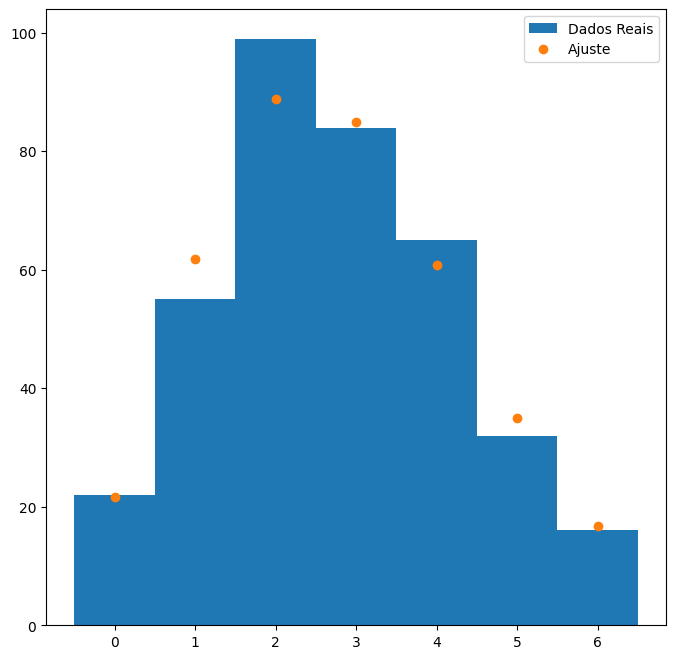

In [ ]:
### Dados Reais
dados = df_P[coluna]

### Criar números inteiros para a análise de Poisson
bins = np.arange(8) - 0.5

### Configurando a figura de comparação
plt.figure(figsize=(8, 8))

### Dados para o ajuste
estimativas, bin_limites, elementos = plt.hist(dados, bins=bins,
                                               label='Dados Reais')

### Determinar o centro de cada bin
bin_medios = 0.5 * (bin_limites[1:] + bin_limites[:-1])

### Definir uma função de Poisson geral para ajuste
def fit_function(k,lamb):
    '''Ajuste do parâmetro lambda de Poisson'''
    return poisson.pmf(k, lamb)

### Fazendo o ajuste da função
### o comando curve_fit --> utiliza como entrada os bin_medios (inteiros - Poisson)
### estimativas, varia a média lambda para reduzir o erro - intrinsecamente
parametros, cov_matriz = curve_fit(fit_function, bin_medios, estimativas/380)

### Visualização sobreposta
x_plot = np.arange(0,7)
plt.plot(x_plot, fit_function(x_plot,*parametros)*380, marker='o',
         linestyle='', label='Ajuste')

plt.legend()
plt.show()

In [ ]:
parametros

array([2.86876844])

In [ ]:
df_P[coluna].mean()

2.8210526315789473

In [ ]:
## Probabilidade de um jogo ter 3 ou mais gols totais
poisson.sf(3, mu=parametros[0])

0.3233954914246133

In [ ]:
## Utilizando Total de gols
coluna = 'total_goal_count'
media = df_P[coluna].mean()
DP = df_P[coluna].std()

df_P['dadosPoisson'] = poisson.rvs(mu=media, size=380)

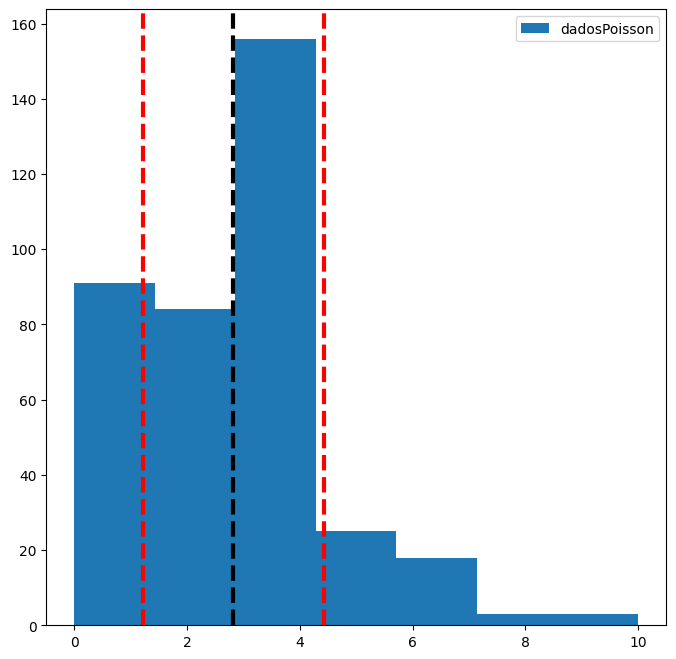

In [ ]:
## Histograma do dados gerados por Poisson
histograma('dadosPoisson', media, DP, 7)

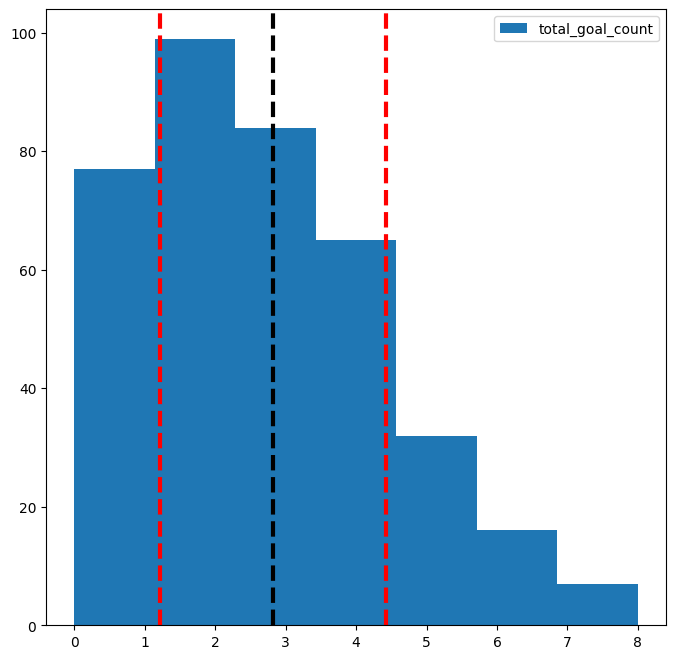

In [ ]:
## Histograma do dados reais
histograma(coluna, media, DP, 7)

# **Exercício adicional**

1.   Qual a probabilidade de um time ter sequência de 4V, 2E e 2D em 8 jogos em casa?
2.   Qual a probabilidade de uma sequência de 4V em 5 jogos fora de casa?
3.   E para uma sequência de 3 jogos em casa (2V e 1E) e 3 jogos fora de casa (1V, 1E e 1D)?


Para o campeonato como um todo temos $N$ jogos com três possibilidades de resultados $V$ - vitória, $E$ - empate e $D$ - derrota. O resultado de cada jogo pode ser modelado como uma variável aleatória $X$, sendo que $p_V$ indica a probabilidade de um determinado jogo resultar em vitória $X_V$. A função massa de probabildaide (**PMF**):

$P(x_V,x_E,x_D \vert N,p_V,p_E,p_D) = P(X_V = x_V,X_E = x_E,X_D = x_D)$
 : \begin{cases} { \displaystyle {N! \over x_V! x_E! x_D!}p_V^{x_V}\times p_E^{x_E}\times p_D^{x_D}}, \quad &
\text{onde:} \sum_{i=1}^3 x_i=N \\  \\
0 & \text{caso contrário} \end{cases}


In [ ]:
df_T.head(3)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,13,3,7,5,5,9,1,12,1,8
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,10,3,4,1,2,1,6,4,8,10
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,10,0,2,3,3,3,3,4,2,3


In [ ]:
df_T.columns[:25]

Index(['team_name', 'common_name', 'season', 'country', 'matches_played',
       'matches_played_home', 'matches_played_away', 'suspended_matches',
       'wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away',
       'losses', 'losses_home', 'losses_away', 'points_per_game',
       'points_per_game_home', 'points_per_game_away', 'league_position',
       'league_position_home', 'league_position_away', 'performance_rank',
       'goals_scored'],
      dtype='object')

In [ ]:
NV_casa = df_T['wins_home'].sum()
NE_casa = df_T['draws_home'].sum()
ND_casa = df_T['losses_home'].sum()

NV_casa, NE_casa, ND_casa, np.sum((NV_casa, NE_casa, ND_casa))

(181, 71, 128, 380)

In [ ]:
# Probabilidades - Casa
pV_casa = NV_casa/380
pE_casa = NE_casa/380
pD_casa = ND_casa/380

pV_casa, pE_casa, pD_casa

(0.4763157894736842, 0.1868421052631579, 0.3368421052631579)

In [ ]:
NV_fora = df_T['wins_away'].sum()
NE_fora = df_T['draws_away'].sum()
ND_fora = df_T['losses_away'].sum()

NV_fora, NE_fora, ND_fora, np.sum((NV_fora, NE_fora, ND_fora))

(128, 71, 181, 380)

In [ ]:
# Probabilidades - Fora
pV_fora = NV_fora/380
pE_fora = NE_fora/380
pD_fora = ND_fora/380

pV_fora, pE_fora, pD_fora

(0.3368421052631579, 0.1868421052631579, 0.4763157894736842)

**Sequência de 4V, 2E e 2D em 8 jogos em casa**

In [ ]:
from scipy.stats import multinomial

multinomial.pmf([4, 2, 2], n=8, p=[pV_casa, pE_casa, pD_casa])

0.08563108634701937

In [ ]:
# Outra forma
rv = multinomial(8, [pV_casa, pE_casa, pD_casa])
rv.pmf([4, 2, 2])

0.08563108634701937

In [ ]:
# ERRADO !!!
binom.pmf(4, 8, pV_casa)*binom.pmf(2, 8, pE_casa)*binom.pmf(2, 8, pD_casa)

0.02069308048764945

**Sequência de 4V em 5 jogos fora de casa**

In [ ]:
# 4V, 1E e 0D ou 4V, 0E e 1D
multinomial.pmf([4, 1, 0], n=5, p=[pV_fora, pE_fora, pD_fora]) + multinomial.pmf([4, 0, 1], n=5, p=[pV_fora, pE_fora, pD_fora])

0.04268668611392358

In [ ]:
# Outra forma
rv = multinomial(5, [pV_fora, pE_fora, pD_fora])
rv.pmf([4, 1, 0]) + rv.pmf([4, 0, 1])

0.04268668611392358

**Sequência 3 jogos em casa (2V e 1E) e 3 jogos fora de casa (1V, 1E e 1D)**

In [ ]:
# 2V e 1E em casa
seq_casa = multinomial.pmf([2, 1, 0], n=3, p=[pV_casa, pE_casa, pD_casa])
seq_casa

0.12717037833503422

In [ ]:
# 1V, 1E e 1D fora de casa
seq_fora = multinomial.pmf([1, 1, 1], n=3, p=[pV_fora, pE_fora, pD_fora])
seq_fora

0.17986528648491037

In [ ]:
seq_casa*seq_fora

0.02287353653162537

# **Referências**

http://users.stat.ufl.edu/~winner/cases.html

https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/percentuais-de-atrasos-e-cancelamentos

https://www.youtube.com/watch?v=UrOXRvG9oYE&t=24s